# Preparing project


## Loading Lib

In [257]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [452]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.3


In [258]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [392]:
import os
import itertools
import math

import scipy.interpolate
import scipy.integrate
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from patsy import dmatrices
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer
from sklearn.preprocessing import label_binarize
from math import log2
from scipy.stats import sem

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
#from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [386]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [450]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [262]:
from pickle import dump
from pickle import load
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'
from pprint import pprint

## Loading data

In [263]:
print(Bold + Blue + 'Your current working directory:' + End)
print(os.getcwd())

Your current working directory:
C:\Users\Phuong_1\Dropbox\Machine Learning\VCB


In [264]:
#data= pd.read_csv('default of credit card clients.csv',header=1)

In [265]:
# data from Kaggle Project
path='C://Users//Phuong_1//Dropbox//Machine Learning//VCB//UCI_Credit_Card.csv'
data=pd.read_csv(path+'//UCI_Credit_Card.csv')

# Exploratory data analysis

Some ideas for exploration:

1. How does the probability of default payment vary by categories of different demographic variables?

2. Which variables are the strongest predictors of default payment?

## General information

In [266]:
print(Bold+'General inforamation about raw data:'+End)
print(data.info())
print(Bold+'The number of row:' + End + '%d'%len(data))
print(Bold+'The number of columns:' + End + '%d'%len(data.columns))
print(Bold+ 'The list of features:'+End)
print(data.columns.tolist())
print(Bold+'The first %d observation'%(len(data.head(3))) + End)
print(data.head(3))
print(Bold+'The missing data:'+End)
print(data.isnull().sum())

General inforamation about raw data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                   

## Descriptive statistics

In [275]:
print(Bold+'Descriptive statistics of %d features:'%len(data.columns[1:25])+End)
#print(data[data.columns[1:25]] .describe().T)
data[data.columns[1:25]] .describe().T

Descriptive statistics of 24 features:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Categorical variables

### SEX

#### Handling abnornal values of SEX

The unique values of SEX:
[2, 1]
The number of 1-valued variables:11888 (39.63 %) 
The number of 2-valued variables:18112 (60.37 %) 


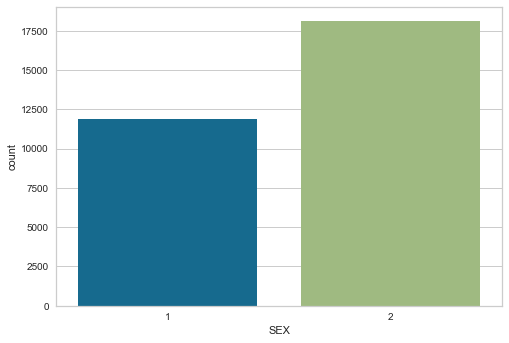

In [276]:
print(Bold+'The unique values of SEX:'+End)
print(data['SEX'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==1].value_counts(), 
                100*data['SEX'][data.SEX==1].value_counts()/len(data['SEX'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==2].value_counts(), 
                100*data['SEX'][data.SEX==2].value_counts()/len(data['SEX'])))
sns.countplot(x='SEX', data=data)
plt.show()

#### Relationship of SEX with the target feature

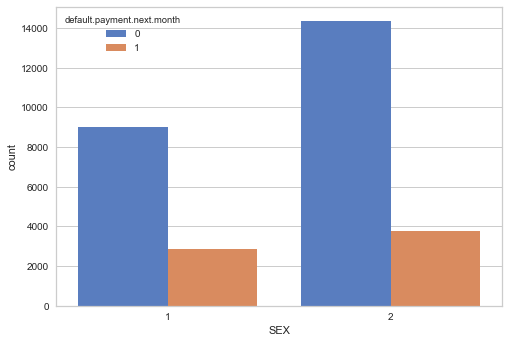

In [277]:
g=sns.countplot(x="SEX", data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$
Interestingly, even though a number of a non-default female are significantly higher than that of non-default male, a number of a default female are higher than that of the default male.

### EDUCATION

#### Handling abnormal values

The unique values of EDUCATION:
[2, 1, 3, 5, 4, 6, 0]
The number of unique values:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
The distribution of unique values of EDUCATION:


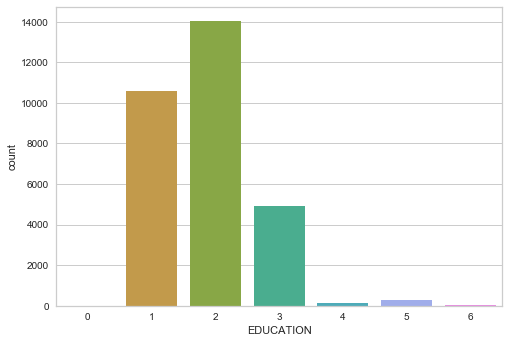

In [279]:
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['EDUCATION'].value_counts())
print(Bold+'The distribution of unique values of EDUCATION:'+End)
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). Let's merge 0, 5, and 6 into the category of 4 as follows.

In [280]:
data['EDUCATION']=data['EDUCATION'].replace([0,5,6],4)
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())

The unique values of EDUCATION:
[2, 1, 3, 4]


The number of 1-valued variables:10585 (35.28 %) 
The number of 2-valued variables:14030 (46.77 %) 
The number of 3-valued variables:4917 (16.39 %) 
The number of 4-valued variables:468 (1.56 %) 


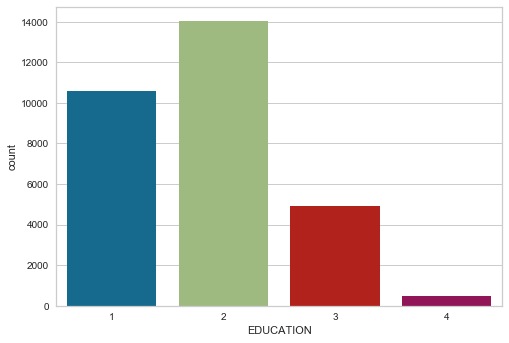

In [281]:
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==1].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==1].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==2].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==2].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==3].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==3].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 4-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==4].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==4].value_counts()/len(data['EDUCATION'])))
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

The majority of the client using the credit cards are undergraduate students, followed by graduate students. The third-largest client group is high school students.

#### Relationship of EDUCATION with the target feature

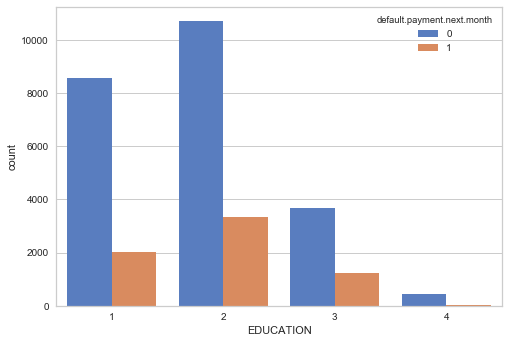

In [282]:
g=sns.countplot(x='EDUCATION', data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$

The client group with the largest default rate is an undergraduate student.

### MARRIAGE

#### Handling abnormal values

The unique values of MARRIAGE:
[1, 2, 3, 0]
The number of unique values:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
The distribution of unique values of MARRIAGE:


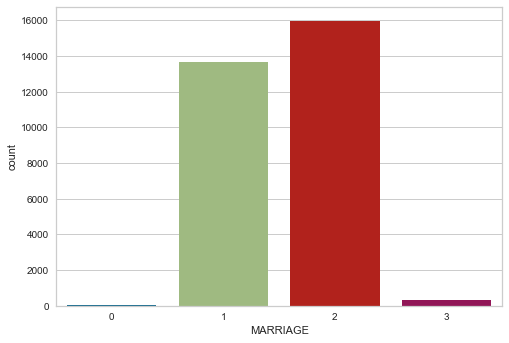

In [283]:
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())
print(Bold+'The distribution of unique values of MARRIAGE:'+End)
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others). Let's merge the group of 0 into the group of 3, such as others.

The unique values of MARRIAGE:
[1, 2, 3]
The number of unique values:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
The number of 1-valued variables:13659 (45.53 %) 
The number of 2-valued variables:15964 (53.21 %) 
The number of 3-valued variables:377 (1.26 %) 


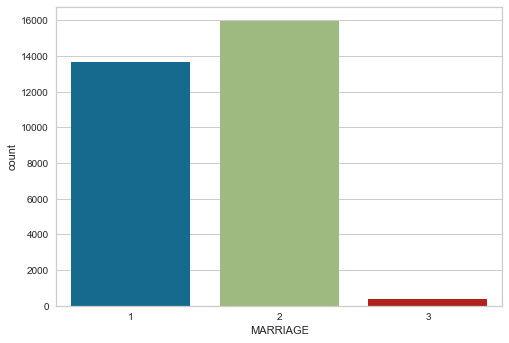

In [284]:
data['MARRIAGE']=data['MARRIAGE'].replace(0,3)
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())

print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==1].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==1].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==2].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==2].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==3].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==3].value_counts()/len(data['MARRIAGE'])))
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others)

The largest client group using the credit cards is the single one, followed by the married group.

#### Relationship of MARRIGAE with the target feature

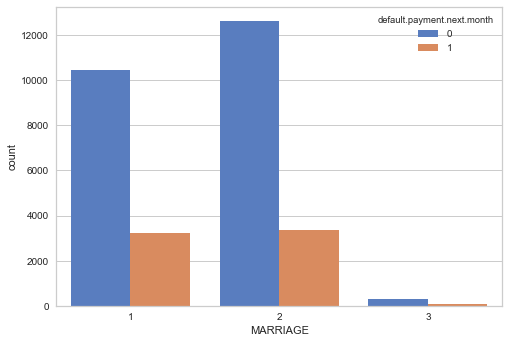

In [285]:
g=sns.countplot(x='MARRIAGE', data=data,hue="default.payment.next.month", palette="muted")

## Repayment status variables

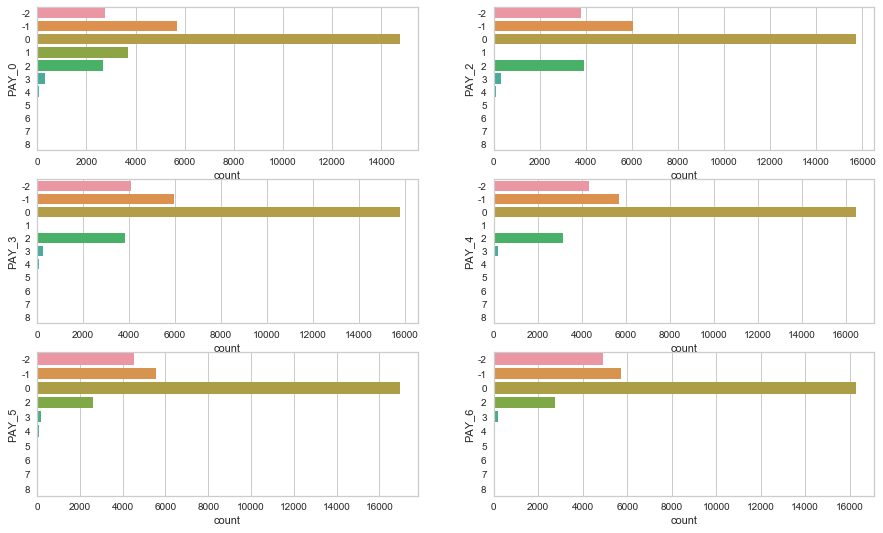

In [286]:
repay_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 9))
for i,col in enumerate(repay_vars):
    plt.subplot(3,2,i+1)
    sns.countplot(y=col,data=data,
              orient='h')

$$\textbf{Comments:}$$

Repayment status in month, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

But, there are two abnormal values of -2 and 0. How to intepret them? Can we replace this abnormal value by 9? I really do not know how to handle these abnormal values of -2 and 0.

## Continuous variables (float64-formated ones)

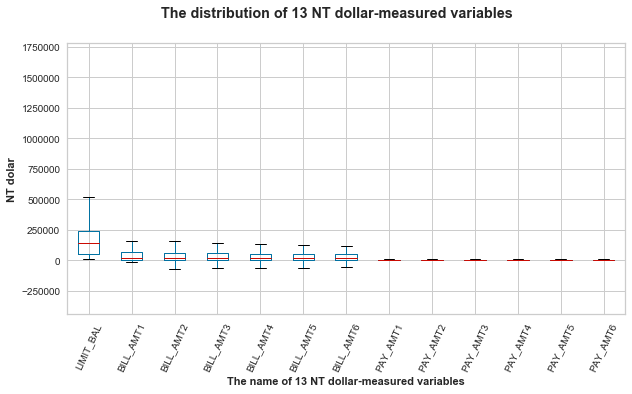

In [293]:
con_vars=data.loc[:,data.dtypes==np.float64].columns.tolist()
boxplot=data.boxplot(column=con_vars,figsize=(10,5),rot=65)
plt.suptitle('The distribution of %d NT dollar-measured variables'%len(con_vars)
             ,fontweight='bold')
plt.ylabel('NT dolar',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(con_vars),fontweight='bold')
plt.show()

 $$\textbf{Comments:}$$
 
 There are big difference in scale among NT Dollar-measured variables. Indeed, We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms.

## Correlation

### Correlation with the target feature

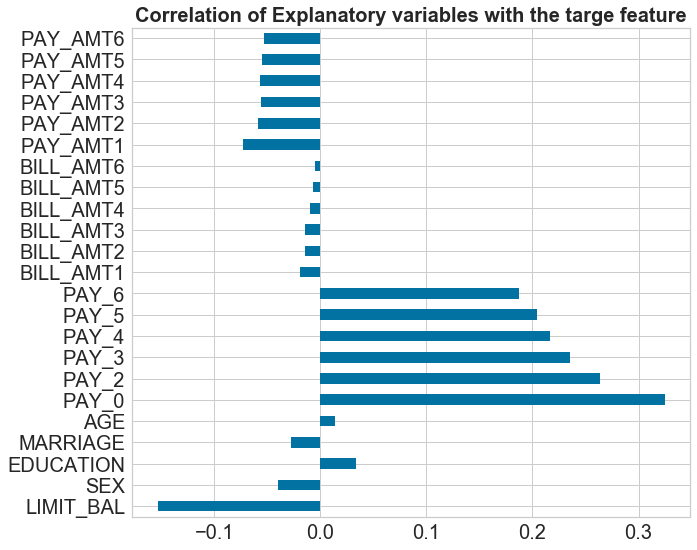

In [295]:
fig=plt.figure(figsize=(10,9))
data[data.columns[1:24]].corrwith(data['default.payment.next.month']).plot.barh(fontsize = 20,
                                                                                rot = 0, grid = True)
plt.title( "Correlation of Explanatory variables with the targe feature",
          fontsize = 20,fontweight='bold')
plt.show()

### Correlation among explanatory variables

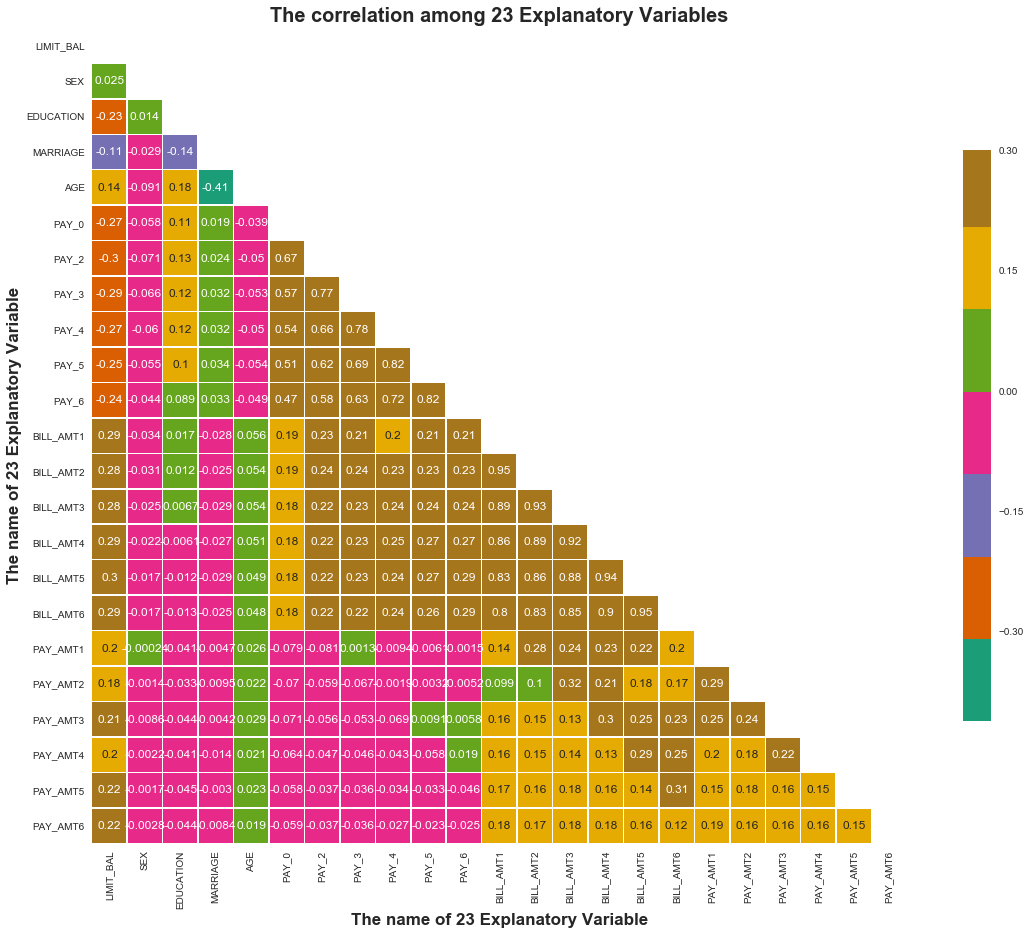

In [296]:
correlations_exvar=data[data.columns[1:24]].corr()
plt.figure(figsize=(20, 15))
mask1 = np.zeros_like(correlations_exvar, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
cmap = 'Dark2'# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations_exvar,cmap=cmap, mask=mask1,annot=True,
            square=True
           ,vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('The correlation among %d Explanatory Variables'% len(data[data.columns[1:24]].columns),
          fontsize=20, fontweight='bold')
plt.ylabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.xlabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.show()

### Correlation with the threshold

In [297]:
def correlation_select(correlation, threshold):
    correlation_up=correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
    select_corr= [column for column in correlation_up.columns if any(abs(correlation_up[column])>threshold)]
    # printing
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+ f'A pair with with correlation over {threshold}:'+End + '%d'%len(select_corr))
    #print(len(select_corr))
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+f'List of pair with correlation over {threshold}:' + End)
    print(select_corr)
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    record_select_correlation=pd.DataFrame(columns=['Attribute_1','Attribute_2','Correlation_Value'])
    for column in select_corr:
        Attribute_11=list(correlation_up.index[abs(correlation_up[column])>threshold])
        Attribute_21=[column for _ in range(len(Attribute_11))]
        Correlation_Value1=list(correlation_up[column][abs(correlation_up[column])>threshold])
        temp_df_corr=pd.DataFrame.from_dict({'Attribute_1': Attribute_11,
                                      'Attribute_2': Attribute_21,
                                      'Correlation_Value': Correlation_Value1})
        record_select_correlation=record_select_correlation.append(temp_df_corr,ignore_index=True)
    print(Bold+f'All pairs with correlation over {threshold}:')
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    return record_select_correlation;

In [298]:
record_select_correlation=correlation_select(correlation=correlations_exvar, threshold=0.5)
print(record_select_correlation)

------------------------------------------------------------------
A pair with with correlation over 0.5:10
------------------------------------------------------------------
List of pair with correlation over 0.5:
['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
------------------------------------------------------------------
All pairs with correlation over 0.5:
------------------------------------------------------------------
   Attribute_1 Attribute_2  Correlation_Value
0        PAY_0       PAY_2           0.672164
1        PAY_0       PAY_3           0.574245
2        PAY_2       PAY_3           0.766552
3        PAY_0       PAY_4           0.538841
4        PAY_2       PAY_4           0.662067
5        PAY_3       PAY_4           0.777359
6        PAY_0       PAY_5           0.509426
7        PAY_2       PAY_5           0.622780
8        PAY_3       PAY_5           0.686775
9        PAY_4       PAY_5           0.8198

## The target feature

In [346]:
y=data['default.payment.next.month'].values
y[0:4]

array([1, 1, 0, 0], dtype=int64)

The unique values of SEX:
[1, 0]
The number of 1-valued variables:6636 (22.12 %) 
The number of 2-valued variables:23364 (77.88 %) 


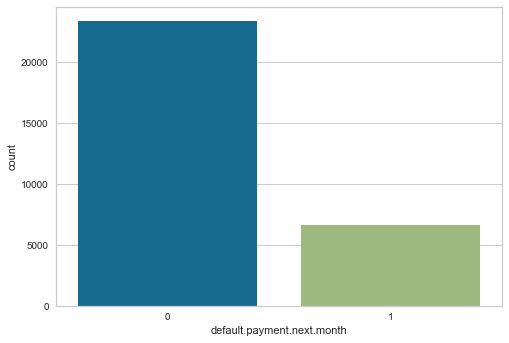

In [299]:
print(Bold+'The unique values of SEX:'+End)
print(data['default.payment.next.month'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts()/len(data['default.payment.next.month'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts()/len(data['default.payment.next.month'])))
sns.countplot(x='default.payment.next.month', data=data)
plt.show()

## The explanatory variables

In [343]:
X=data.iloc[:,1:-1].values
X[:2]

array([[ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
         2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
        -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00],
       [ 1.200e+05,  2.000e+00,  2.000e+00,  2.000e+00,  2.600e+01,
        -1.000e+00,  2.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         2.000e+00,  2.682e+03,  1.725e+03,  2.682e+03,  3.272e+03,
         3.455e+03,  3.261e+03,  0.000e+00,  1.000e+03,  1.000e+03,
         1.000e+03,  0.000e+00,  2.000e+03]])

## The distribution of data

### Defining a UDF fucntion

In [358]:
def plot_imbalance(X: np.ndarray, y: np.ndarray,nco,ncom):
    plt.figure(figsize=(12, 7))
    plt.scatter(X[y == 0, nco], X[y == 0, ncom],
                label="No Default", color='b', alpha=0.7,
            marker='X', linewidth=0.15)
    plt.scatter(X[y == 1, nco], X[y == 1, ncom], 
                label="Default", color='r', 
            marker='v',alpha=0.5, linewidth=0.15)
    plt.legend()
    return plt.show()

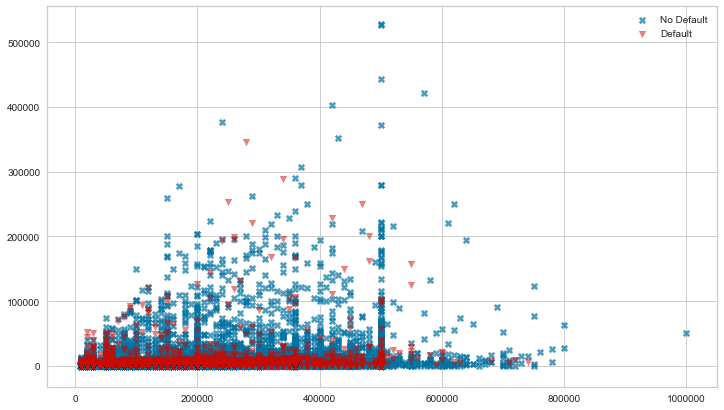

In [359]:
plot_imbalance(X, y,0,-1)

### Reproduced using the DataFrame

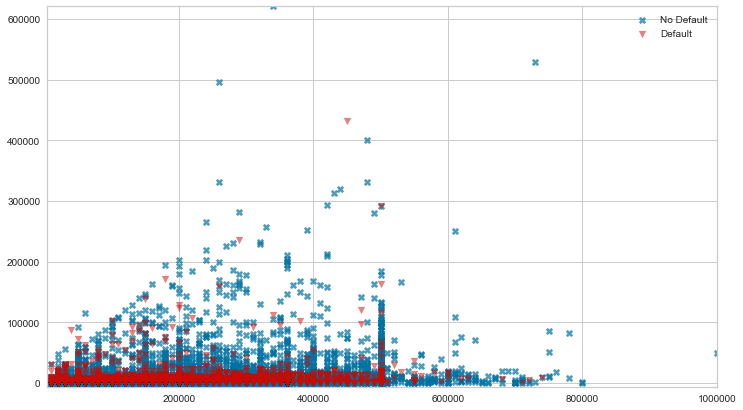

In [334]:
plt.figure(figsize=(12, 7))
plt.scatter(data[data.columns[1:25]]['LIMIT_BAL'][data[data.columns[1:25]]['default.payment.next.month']==0],
            data[data.columns[1:25]]['PAY_AMT4'][data[data.columns[1:25]]['default.payment.next.month']==0], 
            label="No Default", color='b', alpha=0.7,
            marker='X', linewidth=0.15)
plt.scatter(data[data.columns[1:25]]['LIMIT_BAL'][data[data.columns[1:25]]['default.payment.next.month']==1],
            data[data.columns[1:25]]['PAY_AMT4'][data[data.columns[1:25]]['default.payment.next.month']==1], 
            label="Default", color='r', 
            marker='v',alpha=0.5, linewidth=0.15)
plt.autoscale(enable=True, axis='both',tight=True)
plt.legend()
plt.show()

# Preparing data

## Spliting data

In [381]:
seed=7 # for repeatable
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=seed)

print(Bold+'The size of the training data:'+End)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(Bold+'The size of the test data:'+End)
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

The size of the training data:
X_train shape: (21000, 23)
y_train shape: (21000,)
The size of the test data:
X_test shape: (9000, 23)
y_test shape: (9000,)


## The distribution of the train data

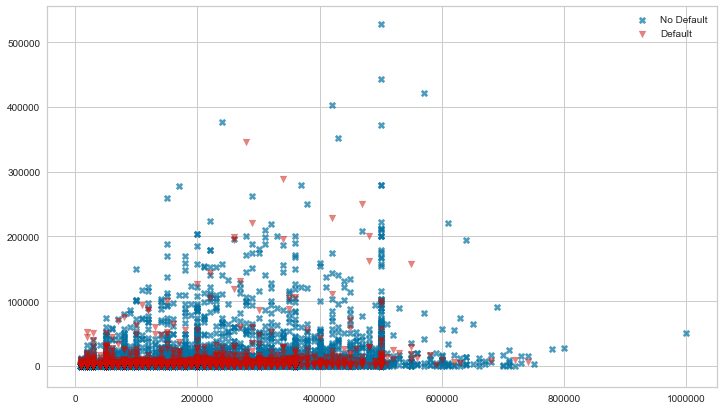

In [382]:
plot_imbalance(X_train, y_train,0,-1)

Since we know that the data set is higly imbanced. Thus, we solve this problem by using Synthetic Minority Oversampling Technique, known as SMOTE as follows.

## SMOTE

It is worth noting that we apply resampling to the training data only

In [361]:
method_smote=SMOTE(random_state=seed)
X_resampled,y_resampled=method_smote.fit_sample(X_train, y_train)

## Checking SMOTE

### Computing the ratio

In [376]:
print(Bold+'Before resampling with SMOTE:'+End)
print(pd.value_counts(pd.Series(y_train)))
print(Bold+'After resampling with SMOTE:'+End)
print(pd.value_counts(pd.Series(y_resampled)))
#y_resampled.value_counts()

Before resampling with SMOTE:
0    16345
1     4655
dtype: int64
After resampling with SMOTE:
1    16345
0    16345
dtype: int64


### Visualisation

In [383]:
def compare_plot(X: np.ndarray, y: np.ndarray, 
                 X_resampled: np.ndarray, 
                 y_resampled: np.ndarray, 
                 nco,ncom,
                 method: str):
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, nco], X[y == 0, ncom], 
                label="No Default", color='b', alpha=0.7,
                marker='X', linewidth=0.15)
    plt.scatter(X[y == 1, nco], X[y == 1, ncom], 
                label="Default", color='r', 
                marker='v',alpha=0.5, linewidth=0.15)
    plt.title('Original Dataset')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, nco], X_resampled[y_resampled == 0, ncom], 
                label="No Default", color='b', alpha=0.7,
                marker='X', linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, nco], X_resampled[y_resampled == 1, ncom], 
                label="Default", color='r', 
                marker='v',alpha=0.5, linewidth=0.15)
    plt.title(method)
    plt.legend()
    plt.show()

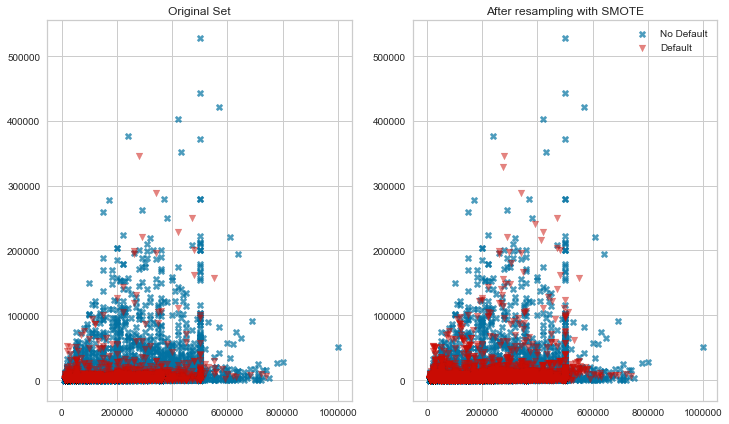

In [429]:
compare_plot(X_train, y_train, X_resampled, y_resampled,0,-1, method='After resampling with SMOTE')

## Standardizing data

In [411]:
standardized_x = preprocessing.scale(X_resampled)
standardized_x[1:5]

array([[ 0.7605961 ,  0.88802473,  0.20490637, -1.11687213,  0.17132113,
        -0.19837054, -0.06523792, -0.02300896, -0.74473359,  0.07731993,
         0.11124379,  0.12949409,  0.7677409 ,  0.15009848, -0.07623309,
        -0.26129965, -0.36502287,  2.72855109, -0.13885777,  4.02552831,
         0.94493259, -0.29568809,  0.08158081],
       [-0.58990172, -1.27213473,  0.20490637,  0.9220215 , -1.07852974,
        -0.19837054, -0.06523792, -0.79135322, -0.74473359, -0.71489541,
        -0.67671643, -0.68077493, -0.68274026, -0.67053422, -0.66155452,
        -0.65868997, -0.64697818, -0.32725962, -0.21145199, -0.23842278,
        -0.30045115, -0.23774591, -0.25081537],
       [-0.03381438, -1.27213473, -1.23693134, -1.11687213,  0.62581235,
         0.62935355, -1.60202274, -0.79135322, -0.74473359, -0.71489541,
        -1.46467665, -0.68837038, -0.6850145 , -0.64824946, -0.57977709,
        -0.65522522, -0.65069903, -0.32725962, -0.14903632,  0.05242314,
        -0.30045115, -0.2956

## Converting to Pandas type

In [412]:
standardized_x_pandas=pd.DataFrame(data=standardized_x,
                           columns=data[data.columns[1:24]].columns)
standardized_x_pandas.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.066548,-1.272135,1.646744,0.922022,0.512190,-0.198371,-0.065238,-0.023009,0.026012,0.077320,...,-0.397131,-0.368629,-0.464120,-0.450129,-0.225399,-0.163440,-0.208931,-0.226721,-0.225027,-0.218336
1,0.760596,0.888025,0.204906,-1.116872,0.171321,-0.198371,-0.065238,-0.023009,-0.744734,0.077320,...,0.150098,-0.076233,-0.261300,-0.365023,2.728551,-0.138858,4.025528,0.944933,-0.295688,0.081581
2,-0.589902,-1.272135,0.204906,0.922022,-1.078530,-0.198371,-0.065238,-0.791353,-0.744734,-0.714895,...,-0.670534,-0.661555,-0.658690,-0.646978,-0.327260,-0.211452,-0.238423,-0.300451,-0.237746,-0.250815
3,-0.033814,-1.272135,-1.236931,-1.116872,0.625812,0.629354,-1.602023,-0.791353,-0.744734,-0.714895,...,-0.648249,-0.579777,-0.655225,-0.650699,-0.327260,-0.149036,0.052423,-0.300451,-0.295688,-0.283295
4,-0.987107,-1.272135,1.646744,-1.116872,1.989286,0.629354,1.471547,1.513680,1.567503,1.661751,...,-0.385537,-0.326331,-0.307777,-0.249592,-0.157492,-0.235458,-0.126178,-0.300451,-0.083705,-0.283295


## Checking them

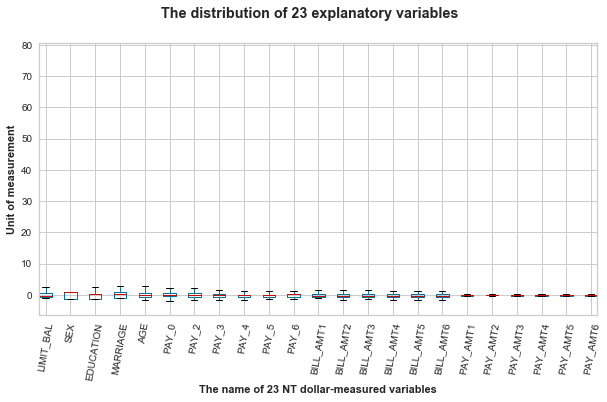

In [413]:
boxplot=standardized_x_pandas.boxplot(figsize=(10,5),rot=80)
plt.suptitle('The distribution of %d explanatory variables'%len(standardized_x_pandas.columns)
             ,fontweight='bold')
plt.ylabel('Unit of measurement',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(standardized_x_pandas.columns),fontweight='bold')
plt.autoscale(enable=True,axis='both',tight=True)
plt.show()

# Choosing algorithm

To avoid overfitting issues, in this study, k-fold crossvalidation
technique is used to estimate fraud detection performance.
In one round of k-fold cross-validation, the data
set is first randomly divided into k subsets (or folds), which
are of approximately equal size and are mutually exclusive.
A machine learning model is then trained and tested k times,
where in each time, one of the subsets is set aside as the testing
data and the remaining k1 subsets are used as training
data. The final testing results are predicted from k trained
sub-models. In our experimental studies, 10 cross validations
(i.e., k = 10) are used as the validation method.

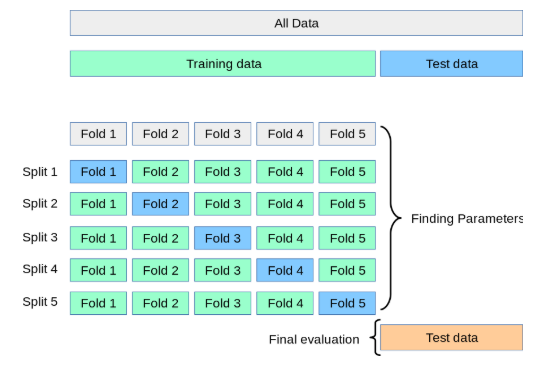

## No Pipeline and Standardization

Please, wait.....
RidgeClass: 0.746076 (0.009347)
Logit: 0.749230 (0.008749)
KNN: 0.837821 (0.005725)
I am done !
The comparing results of 3 different algorithms:
        Model  ROAUC_mean       Std  Trainging time (s)
0  RidgeClass    0.746076  0.009347            0.271205
1       Logit    0.749230  0.008749            6.347370
2         KNN    0.837821  0.005725            4.662878


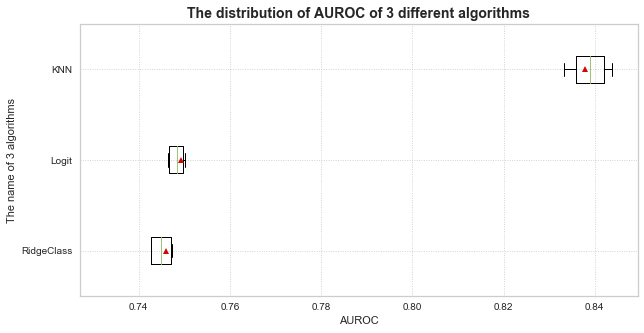

In [410]:
models = []
models.append(('RidgeClass', RidgeClassifier()))
#models.append(('LinearSVC', LinearSVC(max_iter=20000)))
#models.append(('SGDClass', SGDClassifier()))
models.append(('Logit',LogisticRegression(solver='liblinear',
                                            penalty='l1',fit_intercept=False)))
models.append(('KNN',KNeighborsClassifier()))
#models.append(('NearCent',NearestCentroid()))
#models.append(('RanForest', RandomForestClassifier(n_estimators=100)))
#models.append(('ExtTree',ExtraTreesClassifier(n_estimators=100)))
#models.append(('AdaBoost',AdaBoostClassifier()))
#models.append(('GradientBoost',GradientBoostingClassifier()))

competing_model_score = []
results = []
names = []
print(Bold+"Please, wait....."+ End)
for name, model in models:
    scoring = 'roc_auc'
    training_time = []
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    start = timer()
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    training_time.append(timer() - start)
    val = [name, cv_results.mean(), cv_results.std(),sum(training_time)]
    competing_model_score.append(val)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 
print(Bold+"I am done !"+ End)

compared_results = pd.DataFrame(competing_model_score,)
compared_results.columns = ['Model', 'ROAUC_mean',
                         'Std', 'Trainging time (s)']
print(Bold+'The comparing results of %d different algorithms:'%(len(models))+End)
print(compared_results)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.boxplot(results,vert=False, showmeans=True)  
ax.set_yticklabels(names)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.title('The distribution of AUROC of %d different algorithms'%len(models),
          fontsize=14,fontweight='bold')
plt.ylabel('The name of %d algorithms'%(len(models)), fontsize=11)
plt.xlabel('AUROC', fontsize=11)
plt.show()

$$\textbf{Comments:}$$

The results suggest digging deeper into the KNN algorithm. It is very likely that configuration beyond the default may yield even more accurate models.

## Creating a pipeline

We suspect that the differing distributions of the raw data may be negatively impacting the skill
of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of zero
and a standard deviation of one. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

Please, wait.....
ScaledRidgeClass: 0.746075 (0.009348)
ScaledLogit: 0.749941 (0.008963)
ScaledKNN: 0.880552 (0.006280)
I am done !
The comparing results of 3 different algorithm:
              Model  ROAUC_mean       Std  Trainging time (s)
0  ScaledRidgeClass    0.746075  0.009348            0.527133
1       ScaledLogit    0.749941  0.008963            4.001585
2         ScaledKNN    0.880552  0.006280           34.158788


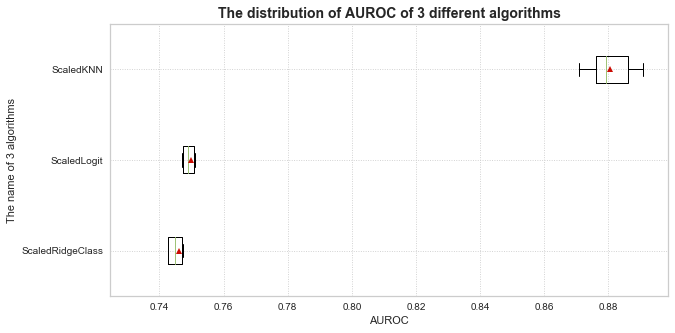

In [409]:
pipelines=[]
pipelines.append(('ScaledRidgeClass', Pipeline([('Standardized', StandardScaler()),
                                         ('ScaledRidgeClass', RidgeClassifier())])))
pipelines.append(('ScaledLogit', Pipeline([ ('Standardized', StandardScaler()) ,
                                    ('ScaledLogit',LogisticRegression(solver='liblinear',
                                            penalty='l1',fit_intercept=False))])))
pipelines.append(('ScaledKNN', Pipeline([('Standardized', StandardScaler()),
                                  ('ScaledKNN',KNeighborsClassifier())])))

competing_model_score_pip = []
results_pip = []
names_pip = []
print(Bold+"Please, wait....."+ End)
for name, model in pipelines:
    scoring = 'roc_auc'
    training_time = []
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    start = timer()
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results_pip.append(cv_results)
    names_pip.append(name)
    training_time.append(timer() - start)
    val = [name, cv_results.mean(), cv_results.std(),sum(training_time)]
    competing_model_score_pip.append(val)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 
print(Bold+"I am done !"+ End)

compared_results_pip = pd.DataFrame(competing_model_score_pip,)
compared_results_pip.columns = ['Model', 'ROAUC_mean',
                         'Std', 'Trainging time (s)']
print(Bold+'The comparing results of %d different algorithm:'%(len(pipelines))+End)
print(compared_results_pip)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.boxplot(results_pip,vert=False, showmeans=True)  
ax.set_yticklabels(names_pip)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.title('The distribution of AUROC of %d different algorithms'%len(pipelines),
          fontsize=14,fontweight='bold')
plt.ylabel('The name of %d algorithms'%(len(pipelines)), fontsize=11)
plt.xlabel('AUROC', fontsize=11)
plt.show()

$$\textbf{Comments:}$$

Running the example provides the results listed below. We can see that KNN is still doing
well, even better than before.

The results suggest digging deeper into the KNN algorithm. It is very likely that configuration beyond the default may yield even more accurate models.

# Evaluating the KNN algorithm

## Traning KNN

In [544]:
pipe_knn=Pipeline(steps=[('Standardized', StandardScaler()),
                   ('ScaledKNN',KNeighborsClassifier())])

pipe_knn.fit(X_resampled, y_resampled)

Pipeline(memory=None,
         steps=[('Standardized',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ScaledKNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

## Predicting values and probability

In [545]:
y_predict_pipknn=pipe_knn.predict(X_test)

prob_predict_pipknn=pipe_knn.predict_proba(X_test)

## Evaluation

For example, if the interest of a bank is to predict the default of its clients, it might be better to use a model less incline to return false negatives. Thus, the precision indicator should be used to evaluate model. However, if the bank (and it is most likely the case) will then invest resources to prevent the default of its clients, the role of false positives will become more and more relevant. Thus, the recall/sensitivity/true positive rate should be used to evaluate model.

Precision and recall are typically inversely related. For instance, precision increases, recall falls and vice-versa

1. Credit card company wants to optimize for recall (predict the probability of default)
2. Insurance company wants to optimize for precision (prevent default)

$\textbf{Precision}$ is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

$\textbf{Recall}$ is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

### Confusion matrix

In [547]:
print('\nConfusion Matrix:')
con_ma=confusion_matrix(y_test, y_predict_pipknn)
print(con_ma)


Confusion Matrix:
[[5451 1568]
 [ 925 1056]]


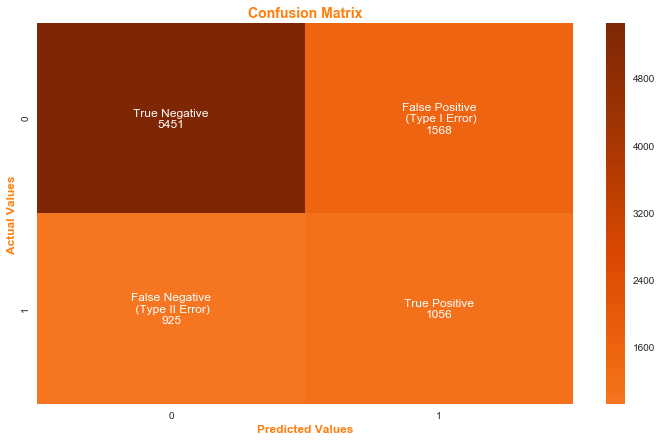

In [548]:
group_names = ['True Negative',
               'False Positive\n (Type I Error)',
               'False Negative\n (Type II Error)',
               'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                con_ma.flatten()]
#group_percentages = ["{0:.2%}".format(value) for value in
 #                    con_ma.flatten()/np.sum(con_ma)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
#labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 #         zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(12, 7))
sns.heatmap(con_ma,center=True, annot=labels, fmt='', cmap='Oranges')
plt.title("Confusion Matrix",fontsize=14,
          fontweight='bold',color='tab:orange')
plt.ylabel('Actual Values',fontsize=12,
          fontweight='bold',color='tab:orange')
plt.xlabel('Predicted Values',fontsize=12,
          fontweight='bold',color='tab:orange')
plt.show()

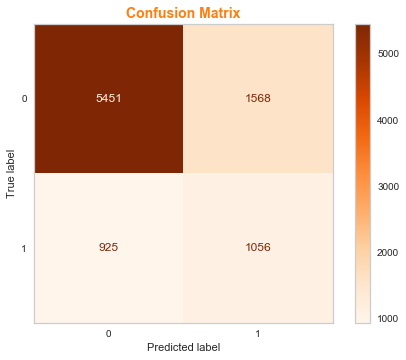

In [553]:
# Checking with plot_confusion_matrix function from sklearn
disp = plot_confusion_matrix(pipe_knn, X_test, y_test,
                                 display_labels=None,
                                 cmap='Oranges',
                                 values_format='d',
                                 normalize=None)
disp.ax_.set_title("Confusion Matrix",fontsize=14,
          fontweight='bold',color='tab:orange')
plt.grid(False)

### Classification Report

In [499]:
print(Bold+'Precision:'+End)
print('No Default (0): %.2f'%(con_ma[0,0]/sum(con_ma[:,0])))
print('Default (1): %.2f'%(con_ma[1,1]/sum(con_ma[:,1])))

print(Bold+'Reall:'+End)
print('No Default (0): ' +'%.2f'%(con_ma[0,0]/sum(con_ma[0,:])))
print('Default (1): %.2f'%(con_ma[1,1]/sum(con_ma[1,:])))

print(Bold+'False Positive Rate (Speci:'+End)

Precision:
No Default (0): 0.85
Default (1): 0.40
Reall:
No Default (0): 0.78
Default (1): 0.53


In [503]:
print('\nClassification Report:')
class_report=classification_report(y_test, y_predict_pipknn)
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      7019
           1       0.40      0.53      0.46      1981

    accuracy                           0.72      9000
   macro avg       0.63      0.65      0.64      9000
weighted avg       0.76      0.72      0.74      9000



### AUROC

plotting the true positive rate against the false positive rate at various threshold settings. Useful for comparing performance of different algorithms.

So if you care about the predicted probability of default, AUROC should be used to evaluate model. Basel II also recommend this indicator. Credit card companies also use this indicator.

ROC Score of KNN Algorithm: 0.70
Various Thresholds for classification:
[2 1 0]


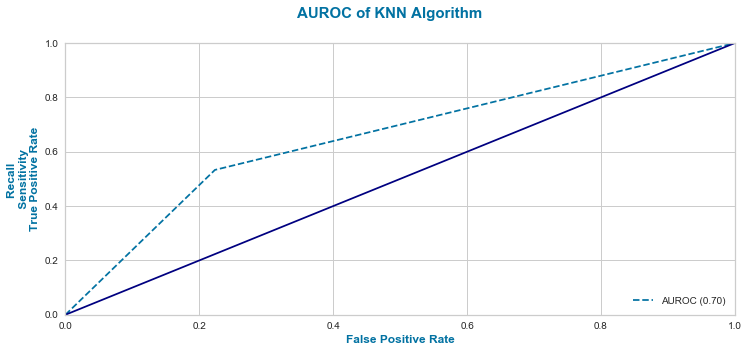

In [542]:
print(Bold + 'ROC Score of KNN Algorithm:' + End 
      + ' %.2f'%(roc_auc_score(y_test, prob_predict_pipknn[:,1])))

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_test, y_predict_pipknn)
print(Bold+'Various Thresholds for classification:'+End)
print(thresholds_valid)
plt.figure(figsize=(12, 5))
plt.plot(fpr_valid,tpr_valid,
         label='AUROC (%.2f)'%(roc_auc_score(y_test, prob_predict_pipknn[:,1])),
         linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
plt.autoscale(enable=True, axis='both',tight=True)
plt.suptitle('AUROC of KNN Algorithm',
          fontsize=15,fontweight='bold',color='b')
plt.ylabel('Recall \n Sensitivity \nTrue Positive Rate', fontsize=12,color='b',fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,color='b',fontweight='bold')
plt.legend(loc="lower right")

plt.show()

### Precision-recall curve

Precision and recall are typically inversely related. For instance, precision increases, recall falls and vice-versa

$\textbf{Precision}$ is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

$\textbf{Recall}$ is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

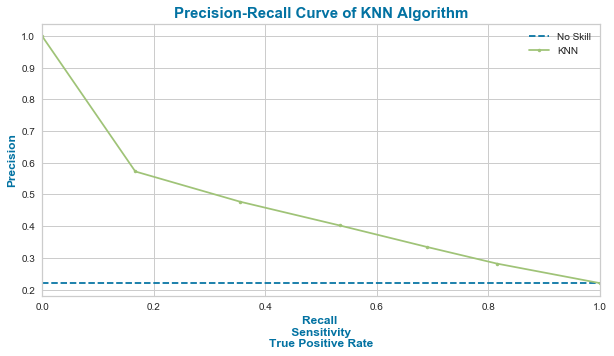

In [543]:
knn_precision, knn_recall, _ = precision_recall_curve(y_test, prob_predict_pipknn[:,1])
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision,  marker='.', label='KNN')
plt.autoscale(enable=True, axis='x',tight=True)
plt.title('Precision-Recall Curve of KNN Algorithm',
          fontsize=15,fontweight='bold',color='b')
plt.xlabel('Recall \n Sensitivity \nTrue Positive Rate', fontsize=12,color='b',fontweight='bold')
plt.ylabel('Precision',fontsize=12,color='b',fontweight='bold')
plt.legend()
plt.show()

Which indicator is used to evaluate model?

1. Case 1: If you care about the predicted probability of default, such as credit card companies, bank, Basel II, recall and AUROC should be used.

2. Case 2: If you care about preventing the default of your clients, such as insurance companies, precision shuold be used

3. Case 3: If you care both the predicted probability of default and preventing the default of your clients, F1-score should be used.

In this project, I care the predicted probability of default of my clients, thus I use recall and AUROC to evaluate my model.

# Algorithm Tuning
In this section we investigate tuning the parameters for the algorithm that show promise from
the spot-checking in the previous section: KNN .

The key parameters of most studied models are determined
by grid-search through cross validation

estimator=Pipeline(steps=[('Standardized', StandardScaler()),
                   ('ScaledKNN',KNeighborsClassifier())])

In [569]:
scaler = StandardScaler().fit(X_resampled)
rescaledX = scaler.transform(X_resampled)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(model, param_grid=param_grid,
                    scoring='recall', cv=kfold)
start = timer()
grid_result = grid.fit(rescaledX, y_resampled)
print('Time: %.2f mins' %((timer() - start)/60))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Time: 7.37 mins
Best: 0.853824 using {'n_neighbors': 1}
0.853824 (0.084835) with: {'n_neighbors': 1}
0.802491 (0.079663) with: {'n_neighbors': 3}
0.770123 (0.070391) with: {'n_neighbors': 5}
0.742458 (0.062422) with: {'n_neighbors': 7}
0.723563 (0.060284) with: {'n_neighbors': 9}
0.711104 (0.055191) with: {'n_neighbors': 11}
0.703546 (0.049812) with: {'n_neighbors': 13}
0.695526 (0.048487) with: {'n_neighbors': 15}
0.687952 (0.045714) with: {'n_neighbors': 17}
0.686987 (0.042006) with: {'n_neighbors': 19}
0.680387 (0.042320) with: {'n_neighbors': 21}


# Evaluating the tunned KNN algorithm


Confusion Matrix:
[[5626 1393]
 [1146  835]]
ROC Score of tunned_KNN Algorithm: 0.61


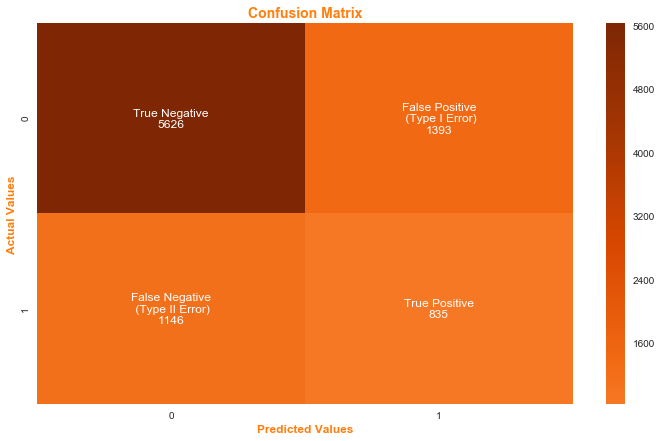

In [573]:
tun_pipe_knn=Pipeline(steps=[('Standardized', StandardScaler()),
                   ('ScaledKNN',KNeighborsClassifier(n_neighbors=1))])

tun_pipe_knn.fit(X_resampled, y_resampled)
#y_predict_knn=tun_pipe_knn.predict(X_test)

#prob_predict_pipknn=tun_pipe_knn.predict_proba(X_test)
print(Bold+'\nConfusion Matrix:'+End)
con_ma_tun=confusion_matrix(y_test, tun_pipe_knn.predict(X_test))
print(con_ma_tun)
print(Bold + 'ROC Score of tunned_KNN Algorithm:' + End 
      + ' %.2f'%(roc_auc_score(y_test, tun_pipe_knn.predict_proba(X_test)[:,1])))
group_names = ['True Negative',
               'False Positive\n (Type I Error)',
               'False Negative\n (Type II Error)',
               'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                con_ma_tun.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(12, 7))
sns.heatmap(con_ma_tun,center=True, annot=labels, fmt='', cmap='Oranges')
plt.title("Confusion Matrix",fontsize=14,
          fontweight='bold',color='tab:orange')
plt.ylabel('Actual Values',fontsize=12,
          fontweight='bold',color='tab:orange')
plt.xlabel('Predicted Values',fontsize=12,
          fontweight='bold',color='tab:orange')
plt.show()